In [1]:
%matplotlib inline
import random
from mxnet import autograd, gluon, init, np, npx
from d2l import mxnet as d2l
from mxnet.gluon import nn, rnn

npx.set_np()

# Exercises week 7
## 11.1.4.1

If there is a hidden layer, the order of the inputs to the hidden layer has no effect on the output of the hidden layer. This means that we can permute the inputs of the hidden layer, without changing the output of the hidden layer or the overall network. 
Since there are $d$ dimensions and the number of permutations of a set with $d$ elements is per definition $d!$, we have what we needed to prove.

## 11.2.5.3

Say $m(x) = max(f,g)$. <br>
We need to prove that $m(x)$ is convex. <br>
For some points $x$ and $x'$:
\begin{eqnarray*}
m(\lambda x + (1 - \lambda) x') &=& f(\lambda x + (1 - \lambda) x') \quad \text{(by defintion of max)} \\
                                &\leq& \lambda f(x) + (1 - \lambda) f(x') \\
                                &\leq& \lambda m(x) + (1 - \lambda) m(x')
\end{eqnarray*}

which proves that $max(f,g)$ is convex if $f$ and $g$ are convex.

To prove that $min(f,g)$ is not convex, we provide a counter example: <br>
Say $f(x) = x^2$ and $g(x) = (x-1)^2$ <br>
If we plot these functions, we can easily see that the pointwise minimum is not convex:

![pointwisenotconvex](./images/plot_min_convex.png)


## 11.3.5.3

We can use $f(x,y) = \frac{1}{2}x + \frac{1}{y}$. The gradient is $\nabla f(x,y) = (\frac{1}{2}, -\frac{1}{y^2})$. For convergence, the gradient needs to be zero. We can easily see that since this function is asymptotic, rate of convergence will be extremely slow.

## 11.4.6.1

In [15]:
import math

def f(x1, x2):  # Objective function
    return x1**2 + 2 * x2**2

def f_grad(x1, x2):  # Gradient of the objective function
    return 2 * x1, 4 * x2

def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    # Simulate noisy gradient
    g1 += np.random.normal(0.0, 1, (1,))
    g2 += np.random.normal(0.0, 1, (1,))
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

def constant_lr():
    return 1

def exponential_lr():
    # Global variable that is defined outside this function and updated inside
    global t
    t += 1
    return math.exp(-0.1 * t)

def polynomial_lr():
    # Global variable that is defined outside this function and updated inside
    global t
    t += 1
    return (1 + 0.1 * t)**(-0.5)

epoch 50, x1: 0.082700, x2: -0.133913


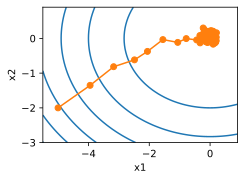

In [16]:
t = 1
lr = constant_lr
step = 50
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=step, f_grad=f_grad))

epoch 50, x1: -0.795715, x2: -0.001640


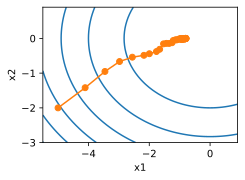

In [17]:
t = 1
lr = exponential_lr
step = 50
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=step, f_grad=f_grad))

epoch 50, x1: 0.122643, x2: -0.004447


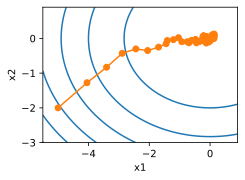

In [18]:
t = 1
lr = polynomial_lr
step = 50
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=step, f_grad=f_grad))

epoch 1000, x1: -0.228444, x2: 0.050780


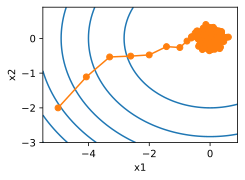

In [19]:
t = 1
lr = constant_lr
step = 1000
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=step, f_grad=f_grad))

epoch 1000, x1: -0.792029, x2: 0.012442


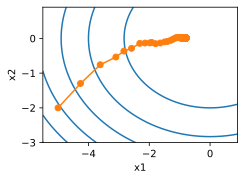

In [20]:
t = 1
lr = exponential_lr
step = 1000
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=step, f_grad=f_grad))

epoch 1000, x1: -0.028131, x2: -0.041182


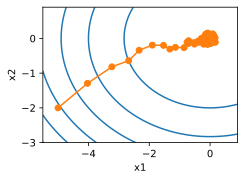

In [21]:
t = 1
lr = polynomial_lr
step = 1000
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=step, f_grad=f_grad))

epoch 5000, x1: -0.850422, x2: -0.050457


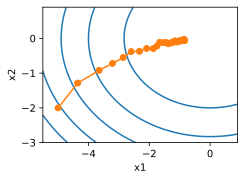

In [22]:
t = 1
lr = exponential_lr
step = 5000
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=step, f_grad=f_grad))

epoch 5000, x1: 0.018352, x2: -0.025888


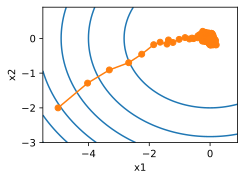

In [23]:
t = 1
lr = polynomial_lr
step = 5000
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=step, f_grad=f_grad))

For both step size 50 and 1000, the constant learning rate scheme has to greatest variance, as expected. We also see that the exponential scheme fails to converge, even with 5000 iterations. The polynomial scheme seems optimal, as it has relatively low variance and it does actually converge, even with a low number of iterations.

## 11.5.7.3

In [2]:
d2l.DATA_HUB['airfoil'] = (d2l.DATA_URL + 'airfoil_self_noise.dat',
                           '76e5be1548fd8222e5074cf0faae75edff8cf93f')

In [3]:
import math
from mxnet.gluon.data import Sampler, RandomSampler, RandomWithReplacementSampler

def get_data_ch11_sampling(batch_size=10, n=1500):
    data = np.genfromtxt(d2l.download('airfoil'), dtype=np.float32,
                         delimiter='\t')
    data = (data - data.mean(axis=0)) / data.std(axis=0)
    dataset = gluon.data.ArrayDataset(data[:n, :-1], data[:n, -1])
    return gluon.data.DataLoader(dataset, batch_size, sampler=RandomWithReplacementSampler(len(dataset))) 

In [7]:
def train_concise_ch11(tr_name, hyperparams, data_iter, num_epochs=2):
    # Initialization
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize(init.Normal(sigma=0.01))
    trainer = gluon.Trainer(net.collect_params(), tr_name, hyperparams)
    loss = gluon.loss.L2Loss()
    animator = d2l.Animator(xlabel='epoch', ylabel='loss',
                            xlim=[0, num_epochs], ylim=[0.22, 0.35])
    n, timer = 0, d2l.Timer()
    for _ in range(num_epochs):
        for X, y in data_iter:
            #print(X)
           # print(y)
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(X.shape[0])
            n += X.shape[0]
            if n % 200 == 0:
                timer.stop()
                animator.add(n / X.shape[0] / len(data_iter),
                             (d2l.evaluate_loss(net, data_iter, loss),))
                timer.start()
    print(f'loss: {animator.Y[0][-1]:.3f}, {timer.avg():.3f} sec/epoch')

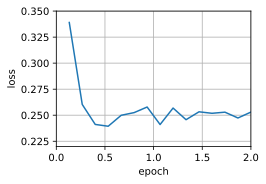

In [5]:
## For sampling with replacement

batch_size = 10
f = get_data_ch11_sampling(batch_size)
train_concise_ch11('sgd', {'learning_rate': 0.05}, f)

loss: 0.245, 0.056 sec/epoch


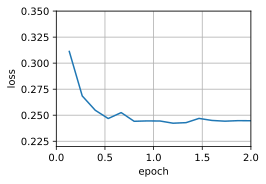

In [9]:
## For regular sgd

def get_data_ch11(batch_size=10, n=1500):
    data = np.genfromtxt(d2l.download('airfoil'), dtype=np.float32,
                         delimiter='\t')
    data = (data - data.mean(axis=0)) / data.std(axis=0)
    data_iter = d2l.load_array((data[:n, :-1], data[:n, -1]), batch_size,
                               is_train=True)
    return data_iter, data.shape[1] - 1

batch_size = 10
f, _ = get_data_ch11(batch_size)
train_concise_ch11('sgd', {'learning_rate': 0.05}, f)

We see that for sampling with replacement, the initial loss is much higher, and the loss is less regular after the initial decrease. For SGD, the loss becomes more or less constant after the first epoch.

## 11.6.5.1

loss: 0.247, 0.056 sec/epoch


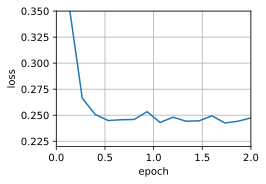

In [32]:
d2l.train_concise_ch11('sgd', {
    'learning_rate': 0.005,
    'momentum': 0.9}, data_iter)

loss: 0.244, 0.056 sec/epoch


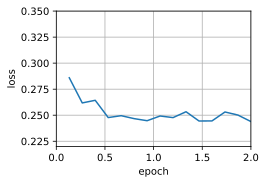

In [31]:
d2l.train_concise_ch11('sgd', {
    'learning_rate': 0.01,
    'momentum': 0.9}, data_iter)

loss: 0.247, 0.055 sec/epoch


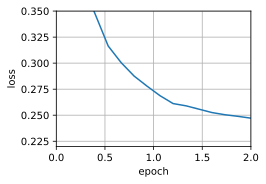

In [33]:
d2l.train_concise_ch11('sgd', {
    'learning_rate': 0.01,
    'momentum': 0.1}, data_iter)

loss: 0.274, 0.054 sec/epoch


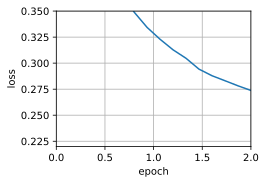

In [34]:
d2l.train_concise_ch11('sgd', {
    'learning_rate': 0.005,
    'momentum': 0.1}, data_iter)

loss: 0.253, 0.058 sec/epoch


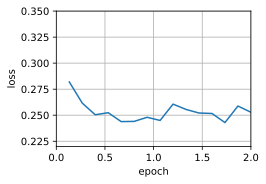

In [11]:
d2l.train_concise_ch11('sgd', {
    'learning_rate': 0.01,
    'momentum': 0.9}, f)

It seems that lower momentum, combined with a low learning rate decreases the rate at which the loss decreases, while a higher momentum with a low learning rate keeps the loss near constant.

## 11.10.5.3

By adapting the learning rate, we reduce the step size as we train. This means that as we near convergence, step size will be slower. This will allow more precise estimation of the minimum. It also helps with vanishing gradient, as it will allow for finer adjustments in the weights. By doing so, the gradient will decrease less quickly.